<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

C:\Users\Avishka Koswaththa\AppData\Local\Temp\ipykernel_19580\3753111141.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


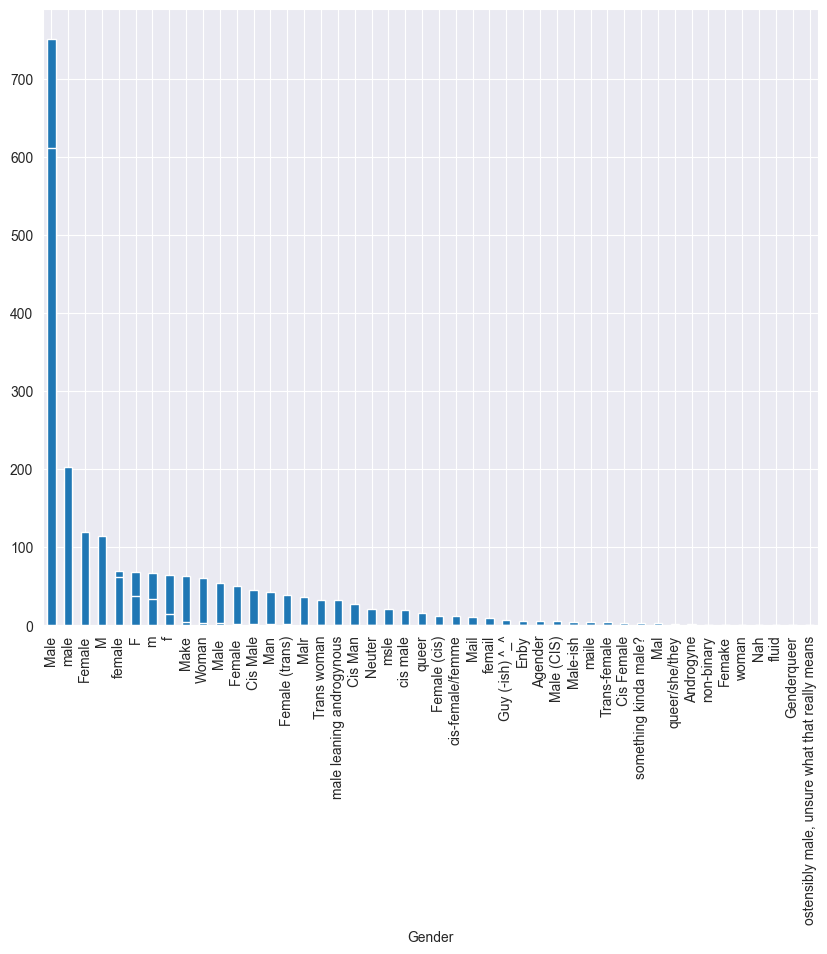

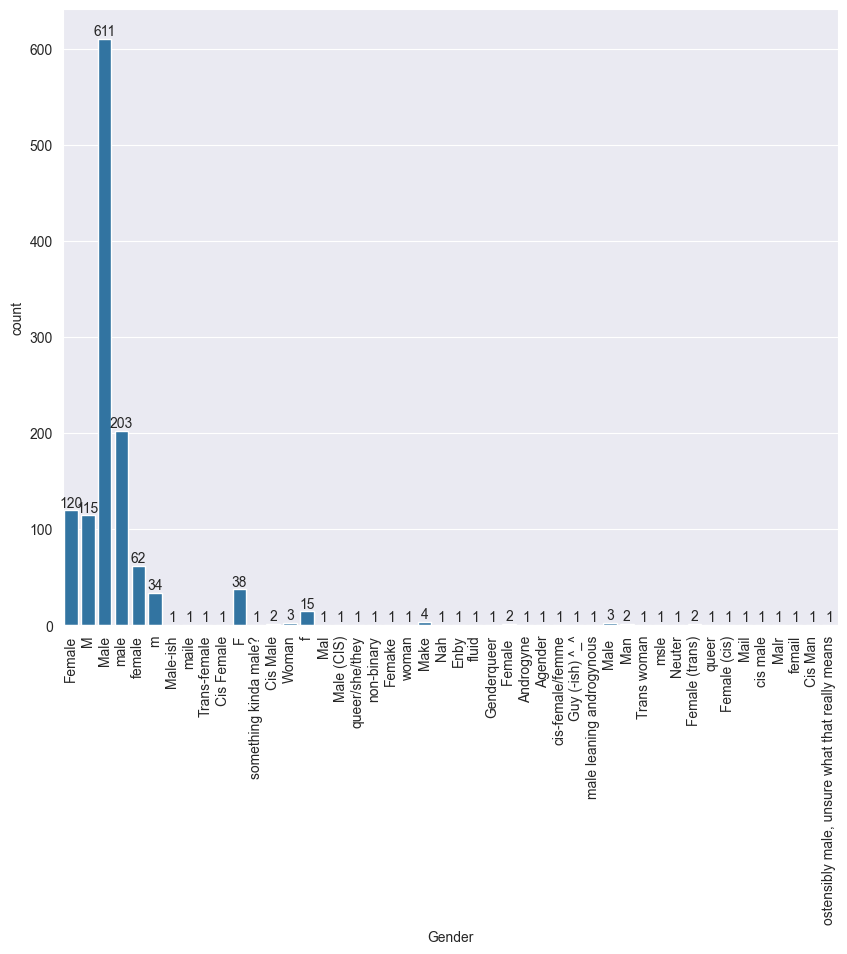

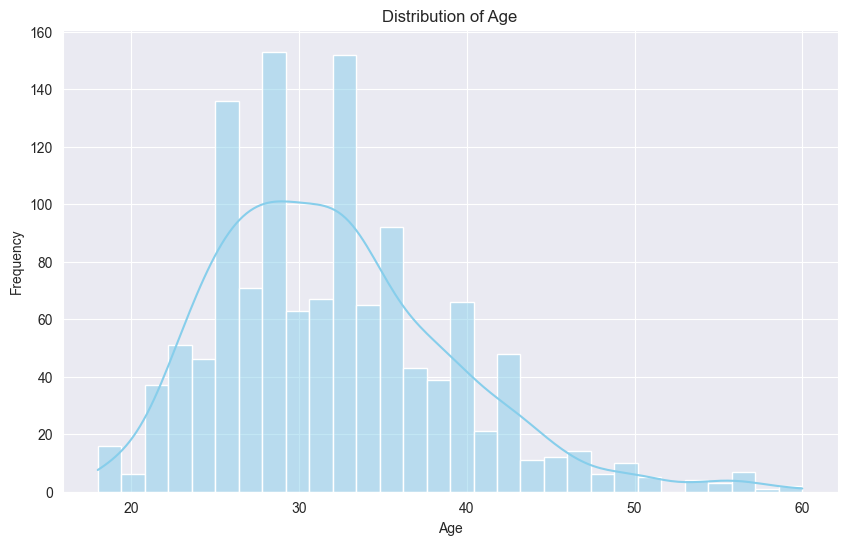

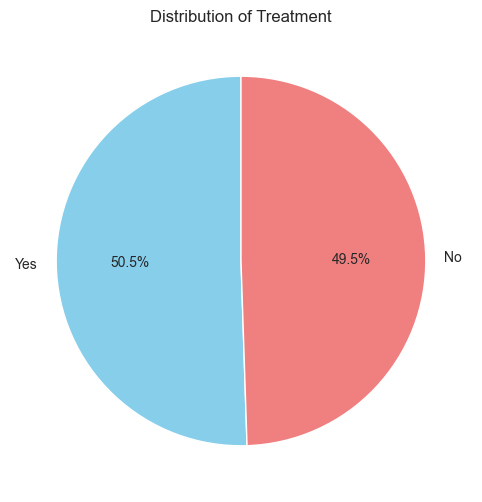

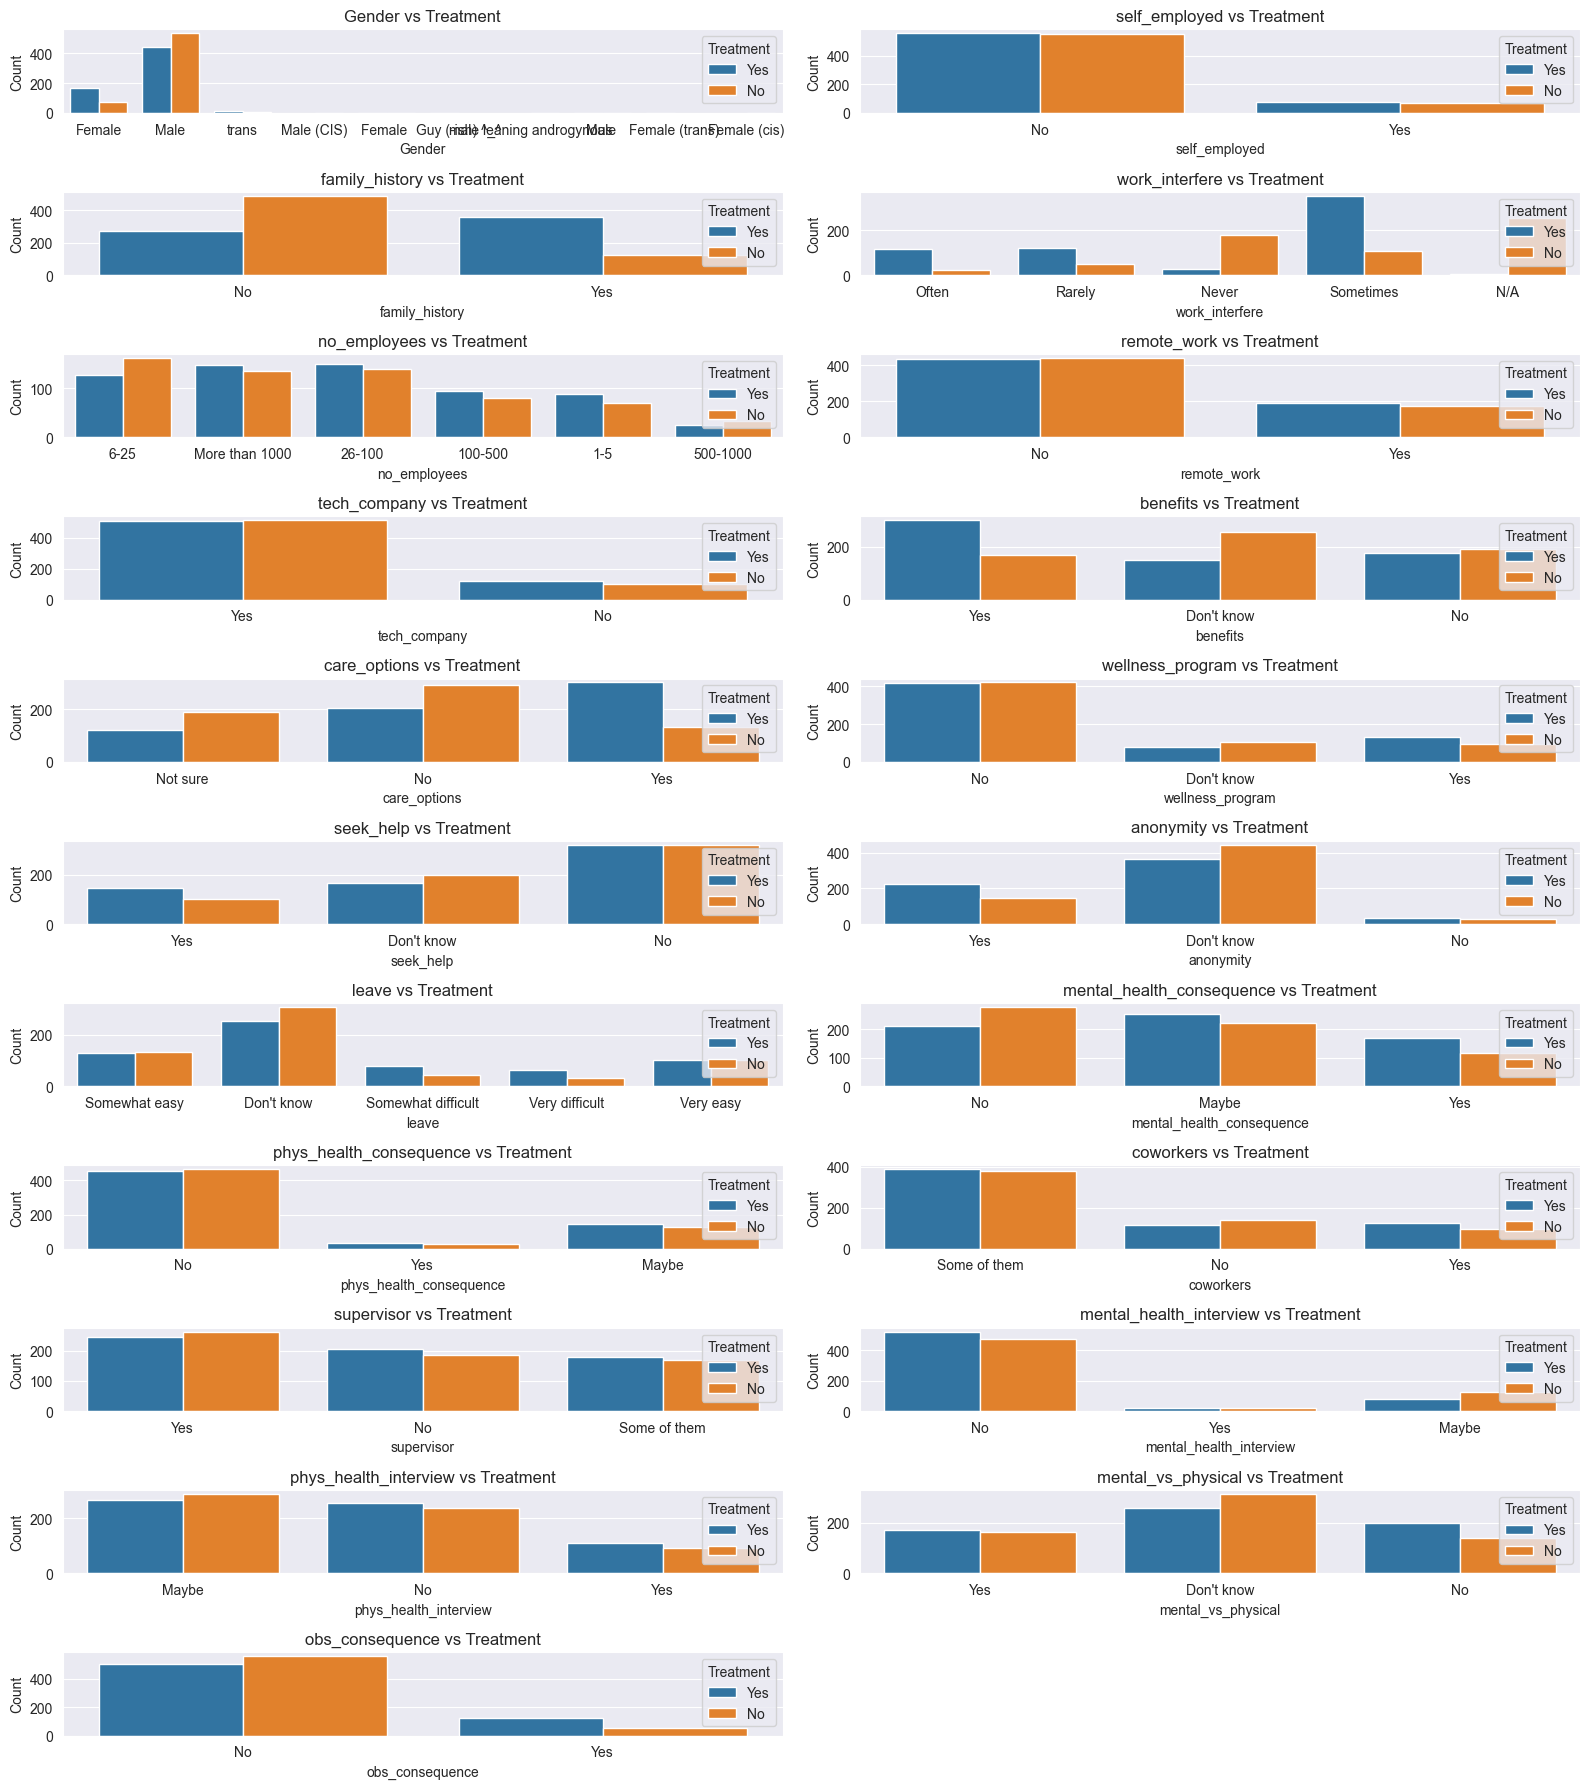

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')               # Set seaborn style
df = pd.read_csv('data/survey.csv')     # Load dataset
df.shape

# Display dataset head, and info
df.head()   
df.tail()
df.info()

# Visualize country distribution
df['Country'].value_counts().plot(kind='bar',figsize=(10,8)) 

# Drop unnecessary columns
df.drop(['Country','state','Timestamp','comments'],axis=1,inplace=True)

#Check for null values
df.isnull().sum()

# Handle missing values in 'self_employed'
val=df['self_employed'].value_counts()

print(f"self_employed: {val}")

# Handle missing values in 'self_employed'
df['self_employed'].value_counts()
df['self_employed'].fillna('No',inplace=True)

# Handle missing values in 'work_interfere'
df['work_interfere'].value_counts()
df['work_interfere'].fillna('N/A',inplace=True)

# Handle outliers in 'Age'
df['Age'].value_counts().plot(kind='bar',figsize=(10,8))
df.drop(df[(df['Age']>60) | (df['Age']<18)].index,inplace=True)

# Check for Gender values
df['Gender'].value_counts().plot(kind='bar',figsize=(10,8))
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is cleaned and categorized DataFrame
plt.figure(figsize=(10, 8))
# Create a countplot with rotated x-axis labels
ax = sns.countplot(data=df, x='Gender')
ax.bar_label(ax.containers[0])

# Rotate x-axis labels horizontally
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  

# Show the plot
plt.show()
# Standardize Gender categories
df['Gender'].replace(['Male','male','M','m','Male','Cis Male','Man','cis male', 'Mail','Male-ish','Male(CIS)','Cis Man','msle','Malr','Mal','maile','Make'],'Male',inplace=True)
df['Gender'].replace(['Female','female','F','f','Woman','Female','femail','Cis Female','Femake','Female(cis)','woman','cis-female/femme'],'Female', inplace=True)
df['Gender'].replace(['Female(trans)','queer/she/they','non-binary','fluid','queer','Androgyne','Trans-female','male learning androgynous','Agender','A little about you','Nah','All','ostensibly male, unsure what that really means','Genderqueer','Enby','p','Neuter','something kinda male?','Guy (-ish)^_^','Trans woman'],value='trans',inplace=True)

# Visualize Age distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')

plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# Pie chart for the 'treatment' column
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

treatment_counts = df['treatment'].value_counts()
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

plt.title('Distribution of Treatment')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 18))

# Extracting categorical columns (excluding the target variable 'treatment')
categorical_columns = df.select_dtypes(include='object').columns.drop('treatment')

# Calculate the number of rows and columns dynamically based on the number of categorical columns
num_rows = len(categorical_columns) // 2 + len(categorical_columns) % 2
num_cols = 2

# Loop through each categorical column and create subplots
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=column, hue='treatment')
    plt.title(f'{column} vs Treatment')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Treatment', loc='upper right')

plt.tight_layout()
plt.show()

#02.Data Preprocessing for Machine Learning

# Display descriptive statistics
df.describe(include='all')

# Separate features and target variable
x=df.drop('treatment',axis=1)
y=df['treatment']

# Use ColumnTransformer for encoding categorical features
# Use for mix of numerical and categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Define a ColumnTransformer
# Use Ordinal Encoder - has order 
ct=ColumnTransformer([('oe',OrdinalEncoder(),['Gender','self_employed','family_history','work_interfere',
                                              'no_employees','remote_work','tech_company','benefits','care_options','wellness_program','seek_help',
                                              'anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers',
                                              'supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence',
                                              ])],remainder='passthrough')

# Apply the ColumnTransformer to the feature matrix x
x = ct.fit_transform(x)

# Label encode the target variable y
le=LabelEncoder()
y=le.fit_transform(y)

# Save the ColumnTransformer for future use
import joblib
joblib.dump(ct,'feature_values')

#Train-Test Split

# Split the dataset into training and testing sets
# 30% of the data will be used for testing, and the remaining 70% will be used for training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=49)

# Perform the train-test split with a 70-30 ratio, using a random seed for reproducibility
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# Import necessary models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_curve,confusion_matrix, classification_report,auc

# Create a dictionary of models
model_dict={}
model_dict['LogisticRegression']=LogisticRegression(solver='liblinear', random_state=49)
model_dict['DecisionTreeRegressor']=DecisionTreeRegressor(random_state=49)

In [5]:
# Handle missing values in 'self_employed'
val=df['self_employed'].value_counts()

print(f"self_employed: {val}")

self_employed: self_employed
No     1107
Yes     140
Name: count, dtype: int64


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
# Define a function to print evaluation metrics
def evaluate_model(model, x_test, y_test):
    # Predict the target variable on the test set
    y_pred = model.predict(x_test)

    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Loop through each model in the dictionary and evaluate on the test set
for model_name, model in model_dict.items():
    print(f"\nEvaluation results for {model_name}:")
    model.fit(x_train, y_train)  # Fit the model on the training set before evaluation
    evaluate_model(model, x_test, y_test)



Evaluation results for LogisticRegression:
Accuracy: 0.85
Precision: 0.82
Recall: 0.89
F1 Score: 0.85

Confusion Matrix:
[[149  37]
 [ 21 168]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       186
           1       0.82      0.89      0.85       189

    accuracy                           0.85       375
   macro avg       0.85      0.84      0.84       375
weighted avg       0.85      0.85      0.84       375


Evaluation results for DecisionTreeRegressor:
Accuracy: 0.77
Precision: 0.79
Recall: 0.75
F1 Score: 0.77

Confusion Matrix:
[[148  38]
 [ 47 142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       186
           1       0.79      0.75      0.77       189

    accuracy                           0.77       375
   macro avg       0.77      0.77      0.77       375
weighted avg       0.77      0.77      0.77       375



In [7]:
from sklearn.model_selection import cross_val_score

# Define a function to perform cross-validation and print mean accuracy
def cross_val(model, x_train, y_train, cv=5):
    scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
    print(f'Mean Accuracy: {scores.mean():.2f}, Standard Deviation: {scores.std():.2f}')

# Loop through each model in the dictionary and perform cross-validation
for model_name, model in model_dict.items():
    print(f"\nCross-validation results for {model_name}:")
    cross_val(model, x_train, y_train)



Cross-validation results for LogisticRegression:
Mean Accuracy: 0.79, Standard Deviation: 0.02

Cross-validation results for DecisionTreeRegressor:
Mean Accuracy: 0.73, Standard Deviation: 0.02


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define logistic regression model
model_lr = LogisticRegression(random_state=49)

# Define the hyperparameter grid for GridSearchCV
param_grid_lr = {
    'C': np.logspace(-3, 3, 7),  # Exponential range for C
    'max_iter': np.linspace(50, 500, 10, dtype=int),
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']
}

# Define cross-validation strategy (StratifiedKFold is suitable for imbalanced datasets)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define custom scoring function using mean accuracy
scorer = make_scorer(accuracy_score, greater_is_better=True)

# Perform GridSearchCV with cross-validated scoring
grid_search_lr = GridSearchCV(
    model_lr, param_grid_lr, cv=cv, scoring=scorer
)

# Fit the GridSearchCV object to the training data
grid_search_lr.fit(x_train, y_train)

# Print cross-validated results
cross_val_results_lr = cross_val_score(
    grid_search_lr.best_estimator_, x_train, y_train, cv=cv, scoring=scorer
)

print(f"Cross-validated results for Logistic Regression: {cross_val_results_lr}")
print(f"Mean Cross-validated Accuracy: {np.mean(cross_val_results_lr):.2f}")
print(f"Standard Deviation of Cross-validated Accuracy: {np.std(cross_val_results_lr):.2f}")

# Print best hyperparameters
print('Best Hyperparameters for Logistic Regression:', grid_search_lr.best_params_)

# Evaluate the Logistic Regression model after tuning
y_pred_lr_after = grid_search_lr.predict(x_test)
accuracy_lr_after = accuracy_score(y_test, y_pred_lr_after)
precision_lr_after = precision_score(y_test, y_pred_lr_after)
recall_lr_after = recall_score(y_test, y_pred_lr_after)
f1_lr_after = f1_score(y_test, y_pred_lr_after)
roc_auc_lr_after = roc_auc_score(y_test, y_pred_lr_after)

print(f'After Tuning - Logistic Regression Accuracy: {accuracy_lr_after:.2f}')
print(f'After Tuning - Logistic Regression Precision: {precision_lr_after:.2f}')
print(f'After Tuning - Logistic Regression Recall: {recall_lr_after:.2f}')
print(f'After Tuning - Logistic Regression F1 Score: {f1_lr_after:.2f}')
print(f'After Tuning - Logistic Regression ROC AUC: {roc_auc_lr_after:.2f}')

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr_after)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)


C:\Users\Avishka Koswaththa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Avishka Koswaththa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Avishka Koswaththa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Avishka Koswaththa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Avishka Koswaththa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Cross-validated results for Logistic Regression: [0.80571429 0.78285714 0.78735632 0.79885057 0.76436782]
Mean Cross-validated Accuracy: 0.79
Standard Deviation of Cross-validated Accuracy: 0.01
Best Hyperparameters for Logistic Regression: {'C': 10.0, 'max_iter': 500, 'solver': 'sag'}
After Tuning - Logistic Regression Accuracy: 0.85
After Tuning - Logistic Regression Precision: 0.82
After Tuning - Logistic Regression Recall: 0.89
After Tuning - Logistic Regression F1 Score: 0.86
After Tuning - Logistic Regression ROC AUC: 0.85
Confusion Matrix for Logistic Regression:
[[150  36]
 [ 20 169]]


C:\Users\Avishka Koswaththa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


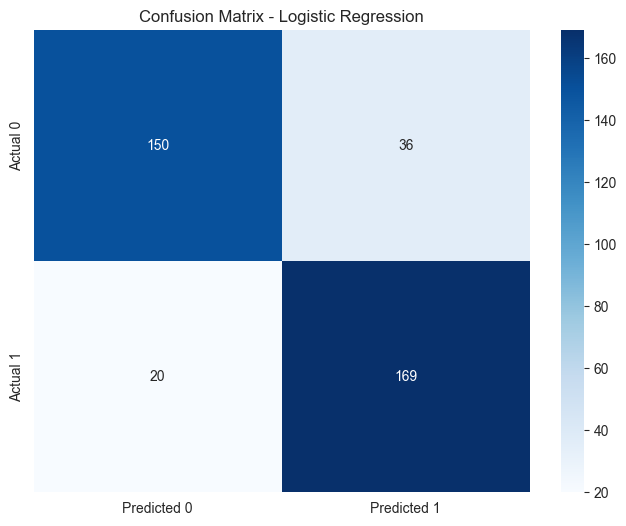

In [25]:
# Plot Logistic Regression Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [22]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define Decision Tree model
model_dt = DecisionTreeClassifier(random_state=49)

# Define the hyperparameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(1, 33)),
    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
}

# Define cross-validation strategy (StratifiedKFold is suitable for imbalanced datasets)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define custom scoring function using mean accuracy
scorer = make_scorer(accuracy_score, greater_is_better=True)

# Perform GridSearchCV with cross-validated scoring
grid_search_dt = GridSearchCV(
    model_dt, param_grid_dt, cv=cv, scoring=scorer
)

# Fit the GridSearchCV object to the training data
grid_search_dt.fit(x_train, y_train)

# Print cross-validated results
cross_val_results_dt = cross_val_score(
    grid_search_dt.best_estimator_, x_train, y_train, cv=cv, scoring=scorer
)

print(f"Cross-validated results for Decision Tree: {cross_val_results_dt}")
print(f"Mean Cross-validated Accuracy: {np.mean(cross_val_results_dt):.2f}")
print(f"Standard Deviation of Cross-validated Accuracy: {np.std(cross_val_results_dt):.2f}")

# Print best hyperparameters
print('Best Hyperparameters for Decision Tree:', grid_search_dt.best_params_)

# Evaluate the Decision Tree model after tuning
y_pred_dt_after = grid_search_dt.predict(x_test)
accuracy_dt_after = accuracy_score(y_test, y_pred_dt_after)
precision_dt_after = precision_score(y_test, y_pred_dt_after)
recall_dt_after = recall_score(y_test, y_pred_dt_after)
f1_dt_after = f1_score(y_test, y_pred_dt_after)
roc_auc_dt_after = roc_auc_score(y_test, y_pred_dt_after)

print(f'After Tuning - Decision Tree Accuracy: {accuracy_dt_after:.2f}')
print(f'After Tuning - Decision Tree Precision: {precision_dt_after:.2f}')
print(f'After Tuning - Decision Tree Recall: {recall_dt_after:.2f}')
print(f'After Tuning - Decision Tree F1 Score: {f1_dt_after:.2f}')
print(f'After Tuning - Decision Tree ROC AUC: {roc_auc_dt_after:.2f}')


Cross-validated results for Decision Tree: [0.82285714 0.81142857 0.81609195 0.83908046 0.77011494]
Mean Cross-validated Accuracy: 0.81
Standard Deviation of Cross-validated Accuracy: 0.02
Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'best'}
After Tuning - Decision Tree Accuracy: 0.87
After Tuning - Decision Tree Precision: 0.81
After Tuning - Decision Tree Recall: 0.97
After Tuning - Decision Tree F1 Score: 0.88
After Tuning - Decision Tree ROC AUC: 0.87



Confusion Matrix for Decision Tree:
[[144  42]
 [  6 183]]


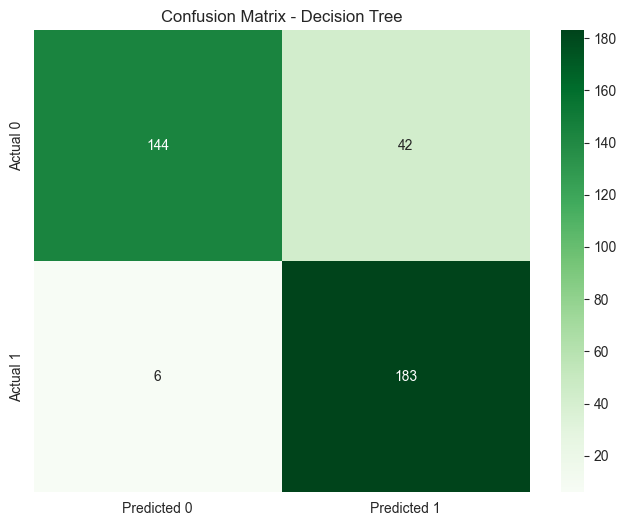

In [26]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt_after)
print("\nConfusion Matrix for Decision Tree:")
print(conf_matrix_dt)

# Plot Decision Tree Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Greens", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - Decision Tree")
plt.show()

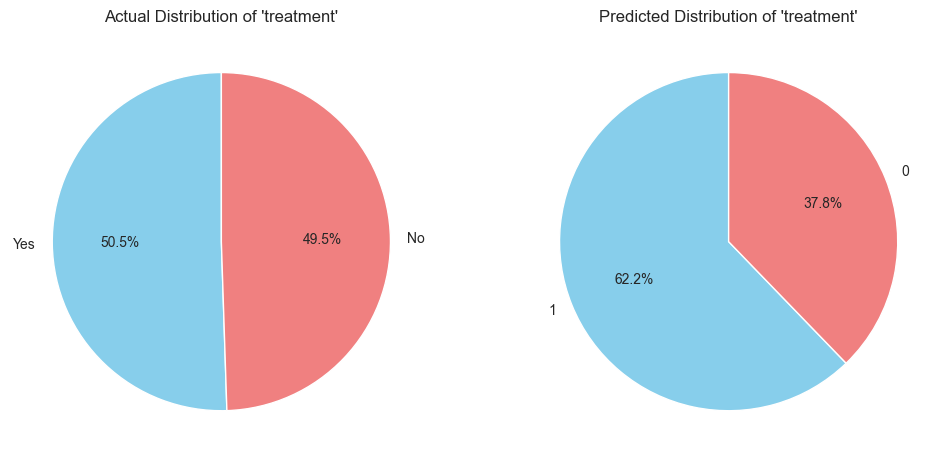

In [27]:
import matplotlib.pyplot as plt

# Assuming you have the true labels 'treatment' and predicted labels 'predicted_treatment'

# Count the occurrences of each class in 'treatment' and 'predicted_treatment'
actual_counts = df['treatment'].value_counts()
predicted_counts = df['predicted_treatment'].value_counts()

# Plotting the pie chart for actual distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(actual_counts, labels=actual_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Actual Distribution of 'treatment'")

# Plotting the pie chart for predicted distribution
plt.subplot(1, 2, 2)
plt.pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Predicted Distribution of 'treatment'")

plt.show()


In [28]:
import joblib

# Assuming rand_search istrained model
joblib.dump(grid_search_lr, 'trained_model_lr.joblib')

joblib.dump(grid_search_dt, 'trained_model_dt.joblib')


['trained_model_dt.joblib']

In [29]:
import pandas as pd
import joblib

# Load the ColumnTransformer
ct = joblib.load('feature_values')

# Load the trained model
grid_search_lr = joblib.load('trained_model_lr.joblib')  # Replace 'your_model_filename' with the actual filename

# Create a new DataFrame with input values
new_input_data = pd.DataFrame({
   'Gender': ['Male'],  
    'self_employed': ['No'],  
    'family_history': ['Yes'],  
    'work_interfere': ['Sometimes'],  
    'Age': [29],  
    'no_employees': ['100-500'], 
    'remote_work': ['No'],  
    'tech_company': ['Yes'], 
    'benefits': ['Yes'],  
    'care_options': ['Yes'],  
    'wellness_program': ['No'], 
    'seek_help': ['No'],  
    'anonymity': ['No'],  
    'leave': ['Somewhat difficult'],  
    'mental_health_consequence': ['Maybe'],  
    'phys_health_consequence': ['No'],  
    'coworkers': ['Some of them'],  
    'supervisor': ['Some of them'],  
    'mental_health_interview': ['No'],  
    'phys_health_interview': ['No'],  
    'mental_vs_physical': ['No'],  
    'obs_consequence': ['No'] 
})

# Apply the saved ColumnTransformer to preprocess the new input data
new_input_transformed = ct.transform(new_input_data)

# Make predictions using the trained model
prediction = grid_search_lr.predict(new_input_transformed)

# Display the prediction
print("Logistic regression prediction:", prediction)


Logistic regression prediction: [1]


In [30]:
import joblib
import pandas as pd

# Load the ColumnTransformer
ct = joblib.load('feature_values')

# Load the trained Decision Tree model
grid_search_dt = joblib.load('trained_model_dt.joblib')  # Replace 'your_model_filename' with the actual filename

# Create a new DataFrame with input values
new_input_data = pd.DataFrame({
    'Gender': ['Male'],
    'self_employed': ['No'],
    'family_history': ['Yes'],
    'work_interfere': ['Sometimes'],
    'Age': [29],
    'no_employees': ['100-500'],
    'remote_work': ['No'],
    'tech_company': ['Yes'],
    'benefits': ['Yes'],
    'care_options': ['Yes'],
    'wellness_program': ['No'],
    'seek_help': ['No'],
    'anonymity': ['No'],
    'leave': ['Somewhat difficult'],
    'mental_health_consequence': ['Maybe'],
    'phys_health_consequence': ['No'],
    'coworkers': ['Some of them'],
    'supervisor': ['Some of them'],
    'mental_health_interview': ['No'],
    'phys_health_interview': ['No'],
    'mental_vs_physical': ['No'],
    'obs_consequence': ['No']
})

# Apply the saved ColumnTransformer to preprocess the new input data
new_input_transformed = ct.transform(new_input_data)

# Make predictions using the trained Decision Tree model
prediction_dt = grid_search_dt.predict(new_input_transformed)

# Display the prediction
print("Decision Tree Prediction:", prediction_dt)


Decision Tree Prediction: [1]
